In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
git remote add origin git@github.com:luanaformiga/digital_house.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-4-cfdbf19a1835>, line 1)

In [118]:
df = pd.read_csv(r'./data/data.csv')
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


# Verificando a presença de missing

A verificação e o tratamento dos missings é uma parte importantíssima da analise exploratória dos dados! A presença de missing pode:
* Representar alguma mensagem (por exemplo, neste data set a falta da informação de salário poderia indicar desemprego?)
* Enviezar a nossa análise, impactando as médias
* Gerar paradoxos em determinados grupos (Paradoxo de Simpson)



!!! Importante verificar se a presença de missing indica que deveriamos fazer algum tratamento nas variáveis !!!


Com o describe( ) conseguimos ver as variáveis numéricas que estão com valores missing, pois a quantidade de contagem é menor que a contagem do ID.
Portanto, temos eventos missing em anos_estudo e salário (Necessário verificar como tratar!). 
Mas com o describe(), não conseguimos determinar a quantidade de missing das variáveis categóricas, uma maneira é utilizar isnull() ou info() - Abaixo

In [10]:
df.describe()

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,66470.000000,6.647000e+04,66470.000000,66036.000000,47878.000000,66470.000000
mean,33234.500000,3.445307e+10,37.634813,8.686065,19706.790323,0.587724
std,19188.380534,1.292491e+10,11.380158,3.374522,88627.532024,0.492248
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16617.250000,3.110060e+10,28.000000,5.000000,3780.000000,0.000000
50%,33234.500000,3.316781e+10,37.000000,8.000000,7113.599609,1.000000
75%,49851.750000,4.310361e+10,47.000000,11.000000,12720.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


E alem disso observar outras informaçõe como:

* Máximo do salário é 999999, que pode estar ligada ao fato de alguém não querer declarar o salário --> Outlier
* Há presença de salários negativos! Que verificamos no min do salário
* Aparentemente é um data set de pessoas em idade "laboral", portanto para a analise de salário não precisariamos nos preocupar com a presença de crianças, por exemplo
* Menor qtde de anos de estudo são 5 anos, que seria aproximadamente o ginázio completo
* Estado civil foi carregado como variável dummy, onde 1: Casado e 0: Solteiro

In [41]:
df.isnull().sum(axis = 0)

Unnamed: 0          0
id                  0
idade               0
sexo                0
anos_estudo       434
cor/raca          242
salario         18592
estado_civil        0
regiao              0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
Unnamed: 0      66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


Outra forma legal de demonstrar graficamente os missings é atraves a biblioteca Seaborn.

!! Um ponto de atenção é que denpendo do tamanho do gráfico ele pode esconder alguma barrinha de missing !!

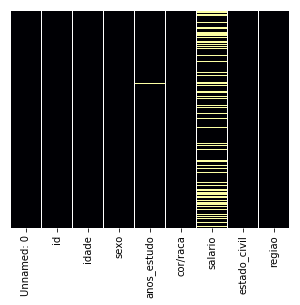

In [43]:
plt.subplots(figsize=(5, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'inferno')

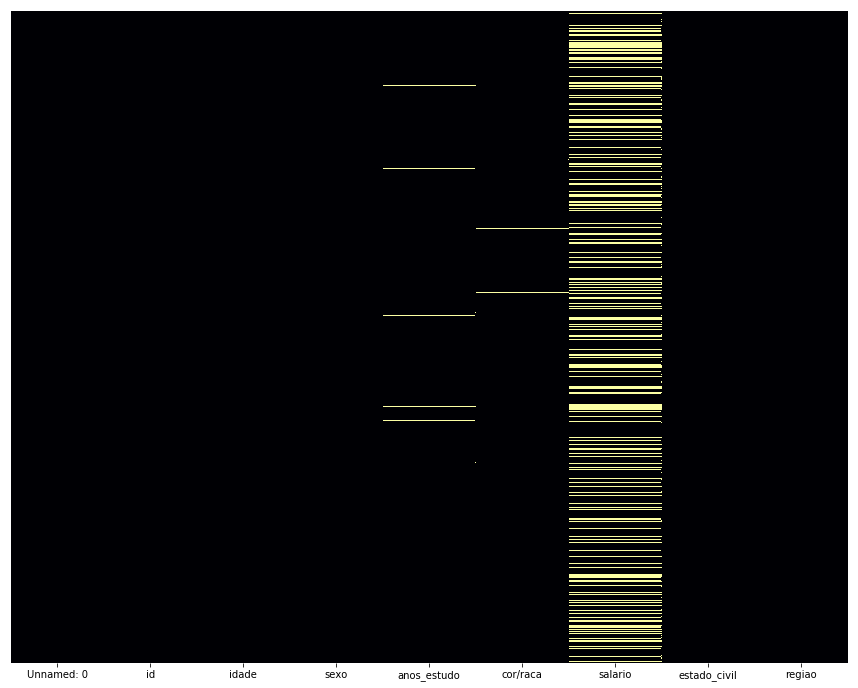

In [44]:
plt.subplots(figsize=(15, 12))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'inferno')

# Analise Exploratória dos Dados

Uma forma super util de fazer uma analise rápida dos dados, para ver a relação das variváveis

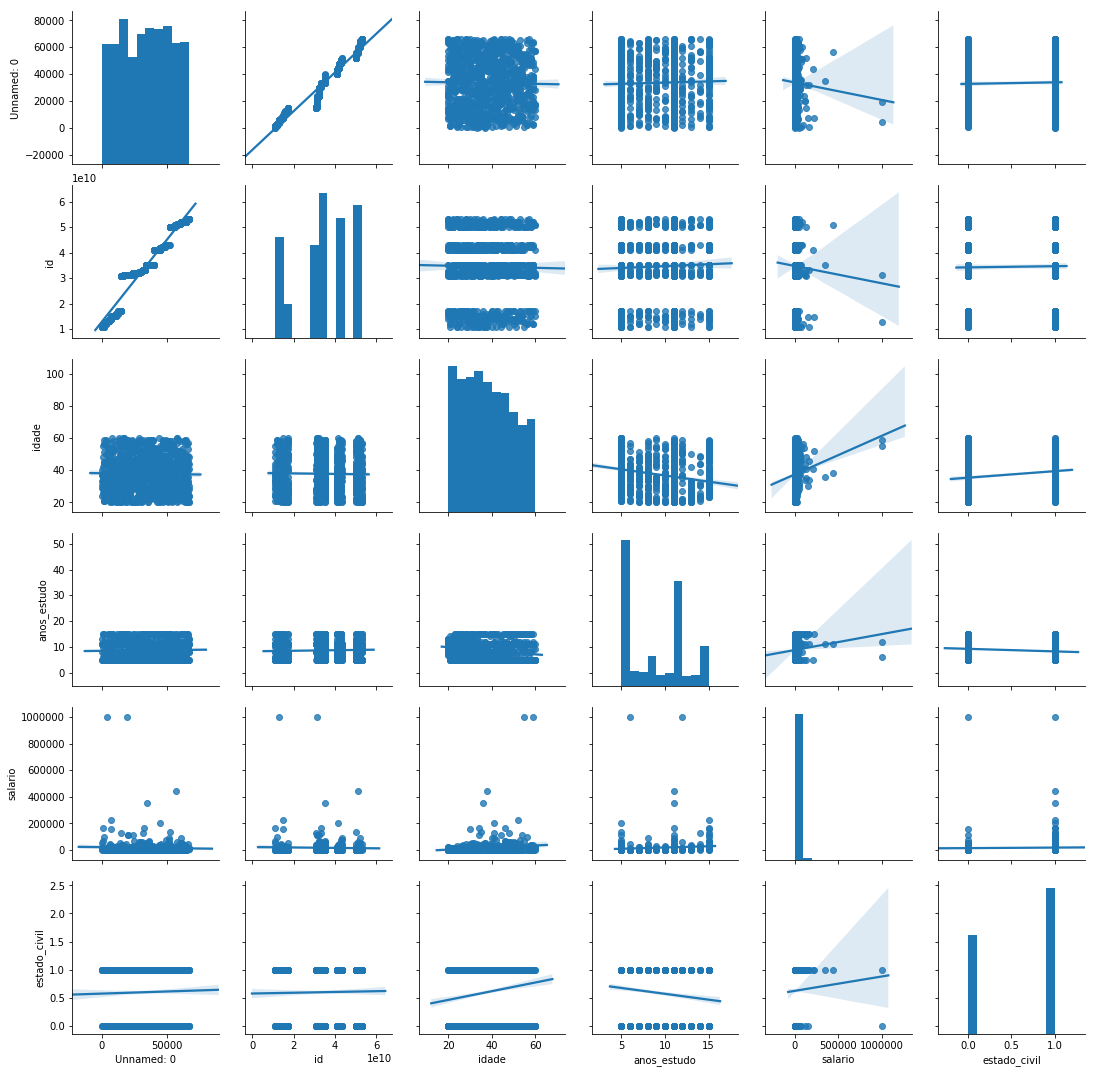

In [64]:
sns.pairplot(df.sample(1000))

Com o pairplot é possível observar:
* Outliers do salário
* Anos de estudo, com concentração em faixas bem específicas (aparentemente faixas de mudança de "nível" de educação)
* Conseguimos observar relação "linear" entre as variáveis, apesar de ainda não ter tratado os outliers


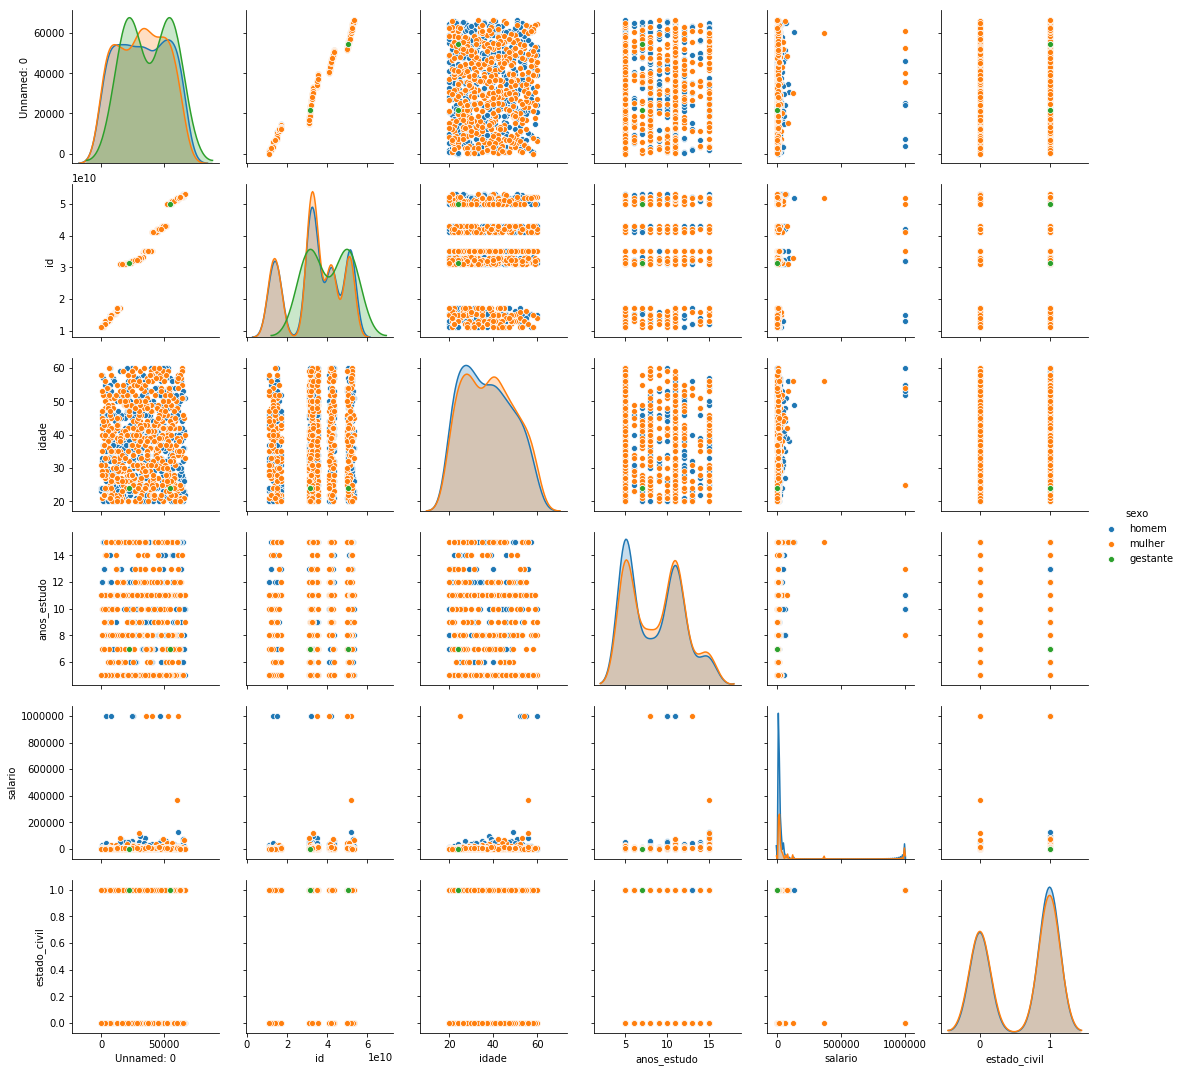

In [67]:
sns.pairplot(df.sample(1000), hue= "sexo")

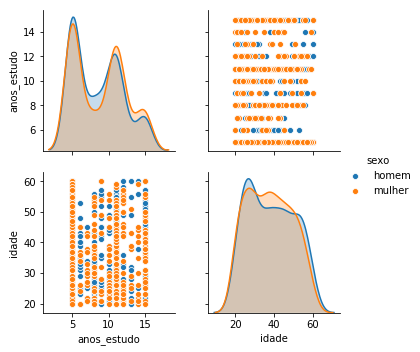

In [63]:
sns.pairplot(df.sample(1000) , vars=['anos_estudo', 'idade'], hue = 'sexo')

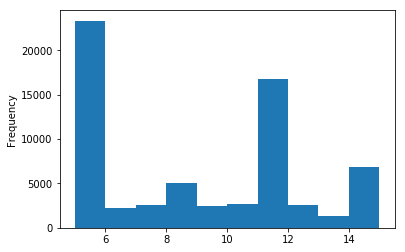

In [68]:
df['anos_estudo'].plot.hist()

Categorizando os níveis de estudo - "Diploma"

In [72]:
# Criando variáveis dummie para os níveis de estudo
df['ginasio'] = df['anos_estudo']>=5
df['fundamental'] = df['anos_estudo']>8
df['medio'] = df['anos_estudo']>11
df['superior'] = df['anos_estudo']==15

In [120]:
df.head()

,Unnamed: 0,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


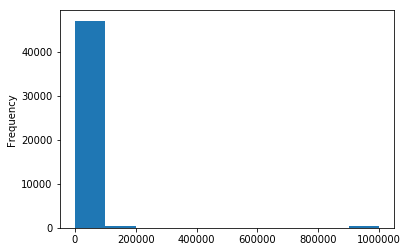

In [121]:
df['salario'].plot.hist()

#### Analise Salário Zerado

In [143]:
mascara_sem_salario = (df['salario'] == 0)

In [153]:
df_sem_salario = df[mascara_sem_salario]

In [154]:
df_sem_salario.shape

(1841, 9)

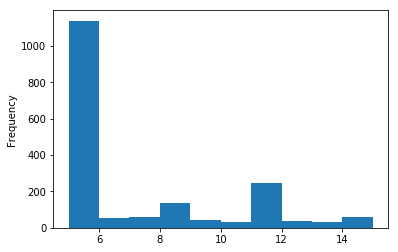

In [146]:
df_sem_salario['anos_estudo'].plot.hist()

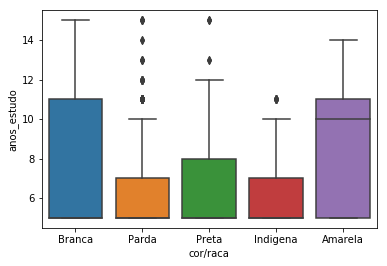

In [147]:
ax = sns.boxplot(x="cor/raca", y="anos_estudo", data=df_sem_salario)

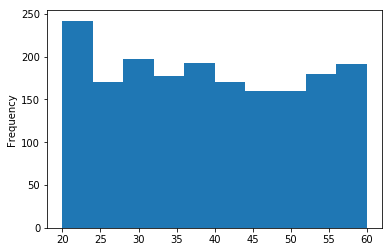

In [148]:
df_sem_salario['idade'].plot.hist()

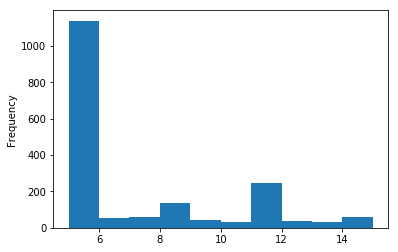

In [149]:
df_sem_salario['anos_estudo'].plot.hist()

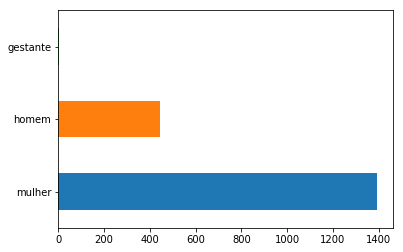

In [150]:
df_sem_salario['sexo'].value_counts().plot(kind='barh')

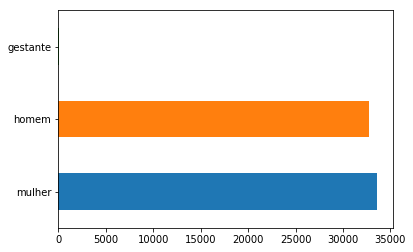

In [132]:
df['sexo'].value_counts().plot(kind='barh')

Apesar dos dados de genero estarem bem distribuidos entre Homens e Mulheres, o Salário zerado ocorre principalmente dentre as mulheres casadas

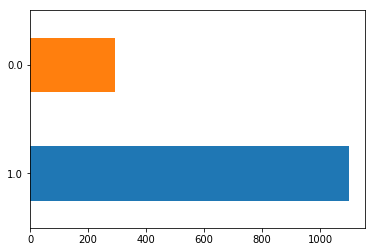

In [162]:
df_sem_salario[(df_sem_salario['sexo'] == 'mulher')]['estado_civil'].value_counts().plot(kind='barh')

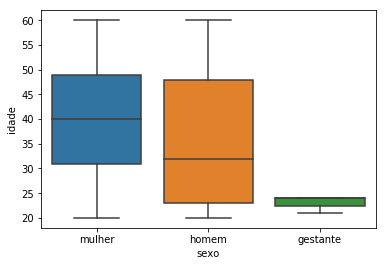

In [163]:
ax = sns.boxplot(x="sexo", y="idade", data=df_sem_salario)

Provavelmente as mulheres com salário zerado já não estão mais participando do mercado de trabalho, portando considera-las para o calculo da média dos salário das mulheres pode impacta a analise. Por isso, para o objetivo de analisar se o salário das mulheres é menor que o de homens vamos retirar as ocorrências de salário zerado.

#### Analise Salário Negativo

In [167]:
mascara_sal_negativo = (df['salario'] < 0)

In [168]:
df_sal_negativo = df[mascara_sal_negativo]

In [169]:
df_sal_negativo.shape

(1101, 9)

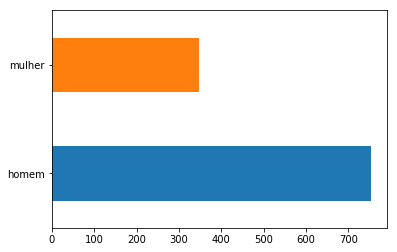

In [172]:
df_sal_negativo['sexo'].value_counts().plot(kind='barh')

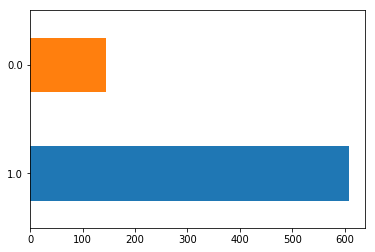

In [173]:
df_sal_negativo[(df_sal_negativo['sexo'] == 'homem')]['estado_civil'].value_counts().plot(kind='barh')

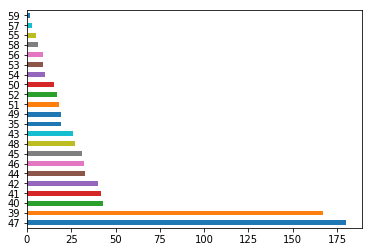

In [176]:
df_sal_negativo[(df_sal_negativo['sexo'] == 'homem')]['idade'].value_counts().plot(kind='barh')

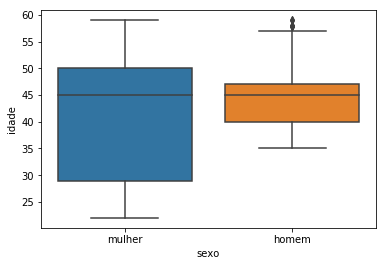

In [177]:
ax = sns.boxplot(x="sexo", y="idade", data=df_sal_negativo)

Salário negativo ocorre principalmente entre homens, com idade entre 40 e 50 anos. Aparentemente está ligado com desemprego. Por isso, uma decisão para tratar estes dados é substiruir os valores negativos por alguma estatística (média, mediana ou moda)

#### Analise Salário 999999

In [179]:
mascara_999999 = (df['salario'] == 999999)

In [181]:
df_sal_999999 = df[mascara_999999]

In [182]:
df_sal_999999.shape

(367, 9)

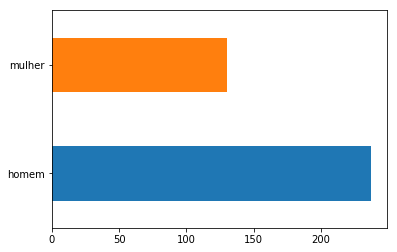

In [183]:
df_sal_999999['sexo'].value_counts().plot(kind='barh')

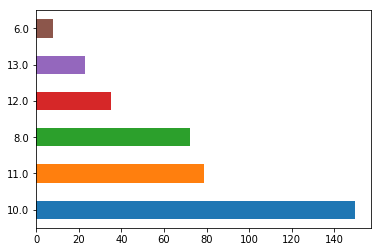

In [184]:
df_sal_999999['anos_estudo'].value_counts().plot(kind='barh')

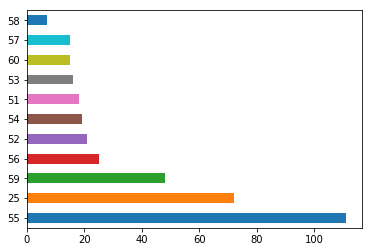

In [185]:
df_sal_999999['idade'].value_counts().plot(kind='barh')

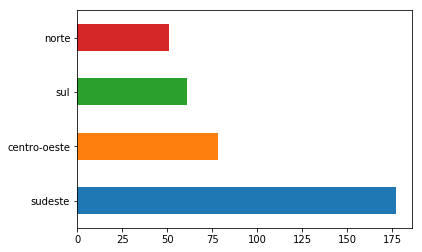

In [186]:
df_sal_999999['regiao'].value_counts().plot(kind='barh')

In [291]:
df2 = df[(df['salario'] != 0)] #porque não dropou as demais variáveis??

In [292]:
df2.shape

(64629, 9)

In [293]:
df2.describe()

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,64629.000000,6.462900e+04,64629.000000,64209.000000,46037.000000,64629.000000
mean,33362.743304,3.457259e+10,37.600907,8.737482,20494.856466,0.584939
std,19154.955863,1.287284e+10,11.361857,3.374741,90292.891648,0.492736
min,0.000000,1.100190e+10,20.000000,5.000000,-1.000000,0.000000
25%,16868.000000,3.111110e+10,28.000000,5.000000,4368.000000,0.000000
50%,33319.000000,3.317162e+10,37.000000,9.000000,7320.599609,1.000000
75%,49988.000000,4.311170e+10,47.000000,11.000000,13200.000000,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,999999.000000,1.000000


In [232]:
df.shape

(66470, 9)

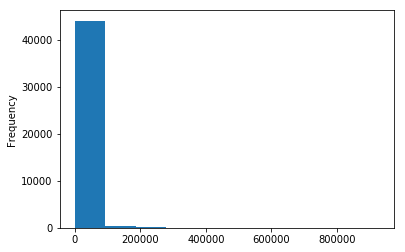

In [284]:
df2['salario'].plot.hist()

In [294]:
mascara = ((df2['salario']>0 ) & (df2['salario'] <999999))

In [295]:
media_sal = df2[mascara]['salario'].mean()
media_sal

12935.519646061623

In [296]:
mediana_sal = df2[mascara]['salario'].median()
mediana_sal

7446.599609375

In [297]:
moda_sal = df2[mascara]['salario'].mode()
moda_sal

0    5229.0
dtype: float64

In [298]:
print(f' Média : {media_sal}')
print(f' Mediana : {mediana_sal}')
print(f' Moda : {moda_sal}')

 Média : 12935.519646061623
 Mediana : 7446.599609375
 Moda : 0    5229.0
dtype: float64


In [301]:
df_final = df2.replace({'salario': {-1: mediana_sal, 999999: media_sal}})
df_final.describe()

,Unnamed: 0,id,idade,anos_estudo,salario,estado_civil
count,64629.000000,6.462900e+04,64629.000000,64209.000000,46037.000000,64629.000000
mean,33362.743304,3.457259e+10,37.600907,8.737482,12804.249125,0.584939
std,19154.955863,1.287284e+10,11.361857,3.374741,20965.599653,0.492736
min,0.000000,1.100190e+10,20.000000,5.000000,6.180000,0.000000
25%,16868.000000,3.111110e+10,28.000000,5.000000,4800.000000,0.000000
50%,33319.000000,3.317162e+10,37.000000,9.000000,7446.599609,1.000000
75%,49988.000000,4.311170e+10,47.000000,11.000000,12935.519646,1.000000
max,66469.000000,5.311702e+10,60.000000,15.000000,928800.000000,1.000000
